[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ClimateMatchAcademy/course-content/blob/main/tutorials/W1D2_StateoftheClimateOceanandAtmosphereReanalysis/W1D2_Tutorial1.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/tutorials/W1D2_StateoftheClimateOceanandAtmosphereReanalysis/W1D2_Tutorial1.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>


# Tutorial 1: Calculating ENSO with Xarray

**Week 1, Day 2, Ocean-Atmosphere Reanalysis**

**Content creators:** Abigail Bodner, Momme Hell, Aurora Basinski

**Content reviewers:** Yosemley Bermúdez, Katrina Dobson, Danika Gupta, Maria Gonzalez, Will Gregory, Nahid Hasan, Sherry Mi, Beatriz Cosenza Muralles, Jenna Pearson, Chi Zhang, Ohad Zivan

**Content editors:** Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS and Google DeepMind


## ![project pythia](https://projectpythia.org/_static/images/logos/pythia_logo-blue-rtext.svg)

Pythia credit: Rose, B. E. J., Kent, J., Tyle, K., Clyne, J., Banihirwe, A., Camron, D., May, R., Grover, M., Ford, R. R., Paul, K., Morley, J., Eroglu, O., Kailyn, L., & Zacharias, A. (2023). Pythia Foundations (Version v2023.05.01) https://zenodo.org/record/8065851

## ![CMIP.png](https://github.com/ClimateMatchAcademy/course-content/blob/main/tutorials/Art/CMIP.png?raw=true)


# Tutorial Objectives

In this notebook (adapted from [Project Pythia](https://foundations.projectpythia.org/core/xarray/enso-xarray.html)), you will practice using multiple tools to examine sea surface temperature (SST) and explore variations in the climate system that occur during El Nino and La Nina events. You will learn to:

1. Load Sea Surface Temprature data from the CESM2 model
2. Mask data using `.where()`
3. Compute climatologies and anomalies using `.groupby()`
4. Use `.rolling()` to compute moving average
5. Compute, normalize, and plot the Oceanic Niño Index

After completing the tasks above, you should be able to plot [Oceanic Niño Index](https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni) that looks similar to the figure below. The red and blue regions correspond to the phases of El Niño and La Niña respectively.

![ONI index plot from NCAR Climate Data Guide](https://climatedataguide.ucar.edu/sites/default/files/styles/extra_large/public/2022-03/indices_oni_2_2_lg.png)

Credit: [NCAR](https://climatedataguide.ucar.edu/sites/default/files/styles/extra_large/public/2022-03/indices_oni_2_2_lg.png)

Pythia credit: Rose, B. E. J., Kent, J., Tyle, K., Clyne, J., Banihirwe, A., Camron, D., May, R., Grover, M., Ford, R. R., Paul, K., Morley, J., Eroglu, O., Kailyn, L., & Zacharias, A. (2023). Pythia Foundations (Version v2023.05.01) https://zenodo.org/record/8065851


# Setup


In [1]:
# installations ( uncomment and run this cell ONLY when using google colab or kaggle )

# !pip install pythia_datasets
# !pip install cartopy
# !pip install geoviews

In [2]:
# imports
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
from pythia_datasets import DATASETS
import cartopy.io.shapereader as shapereader
import pandas as pd
import matplotlib.dates as mdates
import geoviews as gv
import geoviews.feature as gf


In [18]:
# @title Video 1: El Niño Southern Oscillation

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
    def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
        self.id = id
        if source == "Bilibili":
            src = f"https://player.bilibili.com/player.html?bvid={id}&page={page}"
        elif source == "Osf":
            src = f"https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render"
        super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
    tab_contents = []
    for i, video_id in enumerate(video_ids):
        out = widgets.Output()
        with out:
            if video_ids[i][0] == "Youtube":
                video = YouTubeVideo(
                    id=video_ids[i][1], width=W, height=H, fs=fs, rel=0
                )
                print(f"Video available at https://youtube.com/watch?v={video.id}")
            else:
                video = PlayVideo(
                    id=video_ids[i][1],
                    source=video_ids[i][0],
                    width=W,
                    height=H,
                    fs=fs,
                    autoplay=False,
                )
                if video_ids[i][0] == "Bilibili":
                    print(
                        f"Video available at https://www.bilibili.com/video/{video.id}"
                    )
                elif video_ids[i][0] == "Osf":
                    print(f"Video available at https://osf.io/{video.id}")
            display(video)
        tab_contents.append(out)
    return tab_contents


video_ids = [("Youtube", "pkvy9KJUAsA"), ("Bilibili", "BV1p94y1B7d1")]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
    tabs.set_title(i, video_ids[i][0])
display(tabs)

In [19]:
# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "t65v8"

download_link = f"https://osf.io/download/{link_id}/"
render_link = f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render"
# @markdown
out = widgets.Output()
with out:
    print(f"If you want to download the slides: {download_link}")
    display(IFrame(src=f"{render_link}", width=730, height=410))
display(out)

Output()

# Section 1: Introduction to El Niño Southern Oscillation (ENSO)

In W1D1 you practiced using `Xarray` to calculate a monthly climatology, climate anomalies, and a running average on monthly global Sea Surface Temperature (SST) data from the Community Earth System Model v2 (CESM2). You also used the `.where()` method to isolate SST data between **5ºN-5ºS and 190ºE-240ºE (or 170ºW-120ºW)**. This geographic region, known as the **Niño 3.4 region**, is in the tropical Pacific Ocean and is commonly used as a metric for determining the phase of the El Niño-Southern Oscillation (ENSO). ENSO is a recurring climate pattern involving changes in SST in the central and eastern tropical Pacific Ocean, which has two alternating phases:

- **El Niño:** the phase of ENSO characterized by warmer than average SSTs in the central and eastern tropical Pacific Ocean, weakened east to west equatorial winds and increased rainfall in the eastern tropical Pacific.
- **La Niña:** the phase of ENSO which is characterized by cooler than average SSTs in the central and eastern tropical Pacific Ocean, stronger east to west equatorial winds and decreased rainfall in the eastern tropical Pacific.

## Section 1.1: Tropical Pacific Climate Processes

To better understand the climate system processes that result in El Niño and La Niña events, let's first consider typical climate conditions in the tropical Pacific Ocean. Recall from W1D1, **trade winds** are winds that blow east to west just north and south of the equator (these are sometimes referred to as "easterly" winds since the winds are originating from the east and blowing toward the west). And as we discussed yesterday, the reason that the trade winds blow from east to west is related to Earth's rotation, which causes the winds in the Northern Hemisphere to curve to the right and winds in the Southern Hemisphere to curve to the left. This is known as the **Coriolis effect**.

If Earth's rotation affects air movement, do you think it also influences surface ocean water movement? It does! As trade winds blow across the tropical Pacific Ocean, they move water because of friction at the ocean surface. But because of the Coriolis effect, surface water moves to the right of the wind direction in the Northern Hemisphere and to the left of the wind direction in the Southern Hemisphere. However, the speed and direction of water movement changes with depth. Ocean surface water moves at an angle to the wind, and the water under the surface water moves at a slightly larger angle, and the water below that turns at an even larger angle. The average direction of all this turning water is about a right angle from the wind direction. This average is known as **Ekman transport**. Since this process is driven by the trade winds, the strength of this ocean water transport varies in response to changes in the strength of the trade winds.

## Section 1.2: Ocean-Atmosphere Interactions During El Niño and La Niña

So, how does all of this relate to El Niño and La Niña? Changes in the strength of Pacific Ocean trade winds and the resulting impact on Ekman transport create variations in the tropical Pacific Ocean SST, which further results in changes to atmospheric circulation patterns and rainfall.

During an El Niño event, **_easterly trade winds are weaker_**. As a result, less warm surface water is transported to the west via Ekman transport, which causes a build-up of warm surface water in the eastern equatorial Pacific. This creates warmer than average SSTs in the eastern equatorial Pacific Ocean. The atmosphere responds to this warming with increased rising air motion and above-average rainfall in the eastern Pacific. In contrast, during a La Niña event, **_easterly trade winds are stronger_**. As a result, more warm surface water is transported to the west via Ekman transport, and cool water from deeper in the ocean rises up in the eastern Pacific during a process known as upwelling. This creates cooler than average SSTs in the eastern equatorial Pacific Ocean. This cooling decreases rising air movement in the eastern Pacific, resulting in drier than average conditions.

In this tutorial, we'll examine SST temperatures to explore variations in the climate system that occur during El Niño and La Niña events. Specifically, we will plot and interpret CESM2 SST data from the Niño 3.4 region.


# Section 2: Calculate the Oceanic Niño Index


In this notebook, we are going to combine several topics and methods you've covered so far to compute the [Oceanic Niño Index](https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni) using SST from the CESM2 submission to the [CMIP6 project](https://esgf-node.llnl.gov/projects/cmip6/).

You will be working with CMIP6 data later in the week, particularly during W2D1. You can also learn more about CMIP, including additional methods to access CMIP data, please see our [CMIP Resource Bank](https://github.com/ClimateMatchAcademy/course-content/blob/main/tutorials/CMIP/CMIP_resource_bank.md) and the [CMIP website](https://wcrp-cmip.org/).

To calculate the Oceanic Niño Index you will:

1.  Select SST data from Niño 3.4 region of 5ºN-5ºS and 190ºE-240ºE (or 170ºW-120ºW) shown in the figure below.

![](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/nino-regions.gif)

2.  Compute the climatology (here from 2000-2014) for the Niño 3.4 region.
3.  Compute the monthly anomaly for the Niño 3.4 region.
4.  Compute the area-weighted mean of the anomalies for the Niño 3.4 region to obtain a time series.
5.  Smooth the time series of anomalies with a 3-month running mean.

Here we will briefly move through each of these steps, and tomorrow you will learn about them in more detail.


## Section 2.1: Open the SST Data


First, open the SST and areacello datasets, and use Xarray's `merge` method to combine them into a single dataset:


In [5]:
# retrive (fetch) the SST data we are going to be working on
SST_path = DATASETS.fetch("CESM2_sst_data.nc")

# open the file we acquired with xarray
SST_data = xr.open_dataset(SST_path)

# remember that one degree spatial cell is not constant around the globe, each is a different size in square km.
# we need to account for this when taking averages for example

# fetch the weight for each grid cell
gridvars_path = DATASETS.fetch("CESM2_grid_variables.nc")

# open and save only the gridcell weights whose variable name is 'areacello'
# here the 'o' at the end refers to the area cells of the 'ocean' grid
areacello_data = xr.open_dataset(gridvars_path).areacello

# merge the SST and weights into one easy to use dataset - ds stands for dataset
ds_SST = xr.merge([SST_data, areacello_data])
ds_SST


/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:    (time: 180, d2: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object ...
    lat_bnds   (lat, d2) float64 ...
    lon_bnds   (lon, d2) float64 ...
    tos        (time, lat, lon) float32 ...
    areacello  (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

Visualize the first time point in the early 2000s. You can check this on the indexes of the variable 'time' from the ds_SST above. Note that using the `plot` function of our dataarray will automatically include this as a title when we select just the first time index.


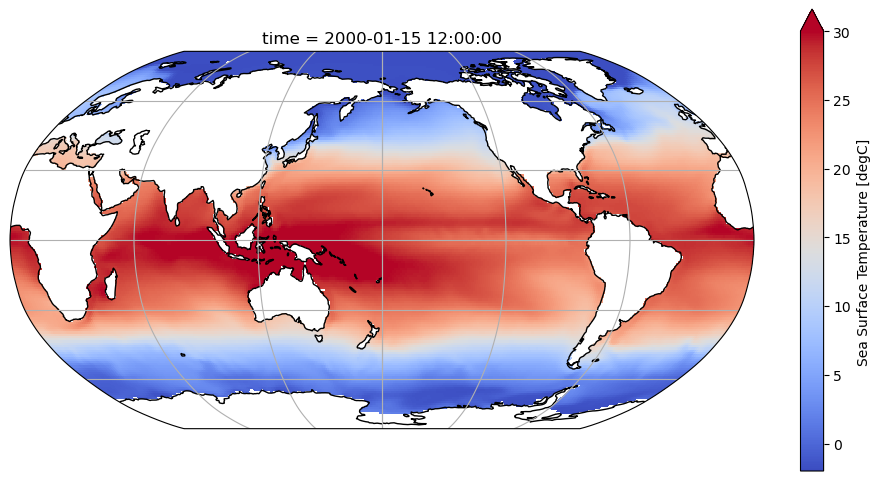

In [6]:
# define the plot size
fig = plt.figure(figsize=(12, 6))

# asssign axis and define the projection -  for a round plot
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

# add coastlines - this will issue a download warning but that is ok
ax.coastlines()

# add gridlines (lon and lat)
ax.gridlines()

# plots the first time index (0) of SST (variable name 'tos') at the first time
ds_SST.tos.isel(time=0).plot(
    ax=ax,
    transform=ccrs.PlateCarree(),  # give our axis a map projection
    vmin=-2,
    vmax=30,  # define the temp range of the colorbarfrom -2 to 30C
    cmap="coolwarm",  # choose a colormap
)


### Interactive Demo 2.1


You can visualize what the next few times look like in the model by using the interactive sliderbar below.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
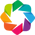

:HoloMap   [time]
   :Overlay
      .Image.I     :Image   [lon,lat]   (tos)
      .Coastline.I :Feature   [Longitude,Latitude]

In [7]:
# a bit more complicated code that allows interactive plots
gv.extension("bokeh")  # load Bokeh
dataset_plot = gv.Dataset(
    ds_SST.isel(time=slice(0, 10))
)  # slice only the first 10 timepoint, as it is a time consuming task
images = dataset_plot.to(gv.Image, ["longitude", "latitude"], "tos", "time")
images.opts(
    cmap="coolwarm",
    colorbar=True,
    width=600,
    height=400,
    projection=ccrs.Robinson(),
    clabel="Sea Surface Temperature [˚C]",
) * gf.coastline


## Section 2.2: Select the Niño 3.4 Region

You may have noticed that the `lon` for the SST data is organized between 0°–360°E.


In [8]:
ds_SST.lon


<xarray.DataArray 'lon' (lon: 360)>
array([  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5])
Coordinates:
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes:
    axis:           X
    bounds:         lon_bnds
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east

This is different from how we typically use `longitude` (-180°–180°). How do we covert the value of longitude between two systems (0-360° v.s. -180°–180°)?

Let's use `lon2` refer to the longitude system of `0°-360°` while `lon` refers to the system of `-180°–180°`. `0°-360°` is equivalent to `0–180°, -180°–0°`.

In other words, `lon2=181°` is same as `lon=-179°`. Hence, in the western hemisphere, `lon2=lon+360`.

Therefore, the Niño 3.4 region should be (-5°–5°, 190–240°) using the `lon2` system.

Now that we have identified the longitude values we need to select, there are a couple ways to select the Niño 3.4 region. We will demonstrate how to use both below.

1. `sel()`


In [9]:
# select just the Nino 3.4 region (note our longitude values are in degrees east) by slicing
tos_nino34_op1 = ds_SST.sel(lat=slice(-5, 5), lon=slice(190, 240))
tos_nino34_op1


<xarray.Dataset>
Dimensions:    (time: 180, d2: 2, lat: 10, lon: 50)
Coordinates:
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2.5 3.5 4.5
  * lon        (lon) float64 190.5 191.5 192.5 193.5 ... 236.5 237.5 238.5 239.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object ...
    lat_bnds   (lat, d2) float64 ...
    lon_bnds   (lon, d2) float64 ...
    tos        (time, lat, lon) float32 ...
    areacello  (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

2. Use `where()` and select all values within the bounds of interest


In [10]:
# select just the Nino 3.4 region (note our longitude values are in degrees east) by boolean conditioning
tos_nino34_op2 = ds_SST.where(
    (ds_SST.lat < 5) & (ds_SST.lat > -5) & (ds_SST.lon > 190) & (ds_SST.lon < 240),
    drop=True,
)  # use dataset where function. use boolean commands
tos_nino34_op2


<xarray.Dataset>
Dimensions:    (time: 180, d2: 2, lat: 10, lon: 50)
Coordinates:
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2.5 3.5 4.5
  * lon        (lon) float64 190.5 191.5 192.5 193.5 ... 236.5 237.5 238.5 239.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2, lat, lon) object 2000-01-01 00:00:00 ... 2015-01-01...
    lat_bnds   (lat, d2, lon) float64 -5.0 -5.0 -5.0 -5.0 ... 5.0 5.0 5.0 5.0
    lon_bnds   (lon, d2, lat) float64 190.0 190.0 190.0 ... 240.0 240.0 240.0
    tos        (time, lat, lon) float32 28.26 28.16 28.06 ... 28.54 28.57 28.63
    areacello  (lat, lon) float64 1.233e+10 1.233e+10 ... 1.233e+10 1.233e+10
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

You can verify that `tos_nino34_op1` and `tos_nino34_op2` are the same by comparing the lat and lon indexes.

We only need one of these, so let us choose the second option and set that to the variable we will use moving forward.


In [11]:
# SST in just the Nino 3.4 region
tos_nino34 = tos_nino34_op2


Let's utilize the same code we used to plot the entire Earth, but this time focusing on the Niño 3.4 region slice only.


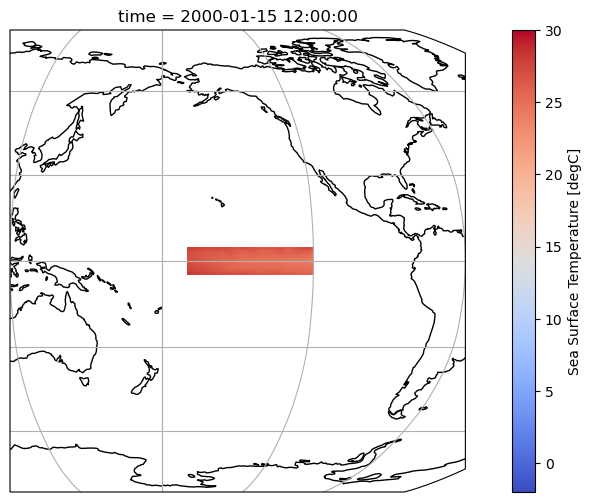

In [12]:
# define the figure size
fig = plt.figure(figsize=(12, 6))

# assign axis and projection
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

# add coastlines
ax.coastlines()

# add gridlines (lon and lat)
ax.gridlines()

# plot as above
tos_nino34.tos.isel(time=0).plot(
    ax=ax, transform=ccrs.PlateCarree(), vmin=-2, vmax=30, cmap="coolwarm"
)

# make sure we see more areas of the earth and not only the square around Niño 3.4
ax.set_extent((120, 300, 10, -10))


## Section 2.3: Compute the Climatology and Anomalies

Now that we have selected our area, we can compute the monthly anomaly by first grouping all the data by month, then substracting the monthly climatology from each month.


In [13]:
# group the dataset by month
tos_nino34_mon = tos_nino34.tos.groupby("time.month")

# find the monthly climatology in the Nino 3.4 region
tos_nino34_clim = tos_nino34_mon.mean(dim="time")

# find the monthly anomaly in the Nino 3.4 region
tos_nino34_anom = tos_nino34_mon - tos_nino34_clim

# take the area weighted average of anomalies in the Nino 3.4 region
tos_nino34_anom_mean = tos_nino34_anom.weighted(tos_nino34.areacello).mean(
    dim=["lat", "lon"]
)
tos_nino34_anom_mean


<xarray.DataArray 'tos' (time: 180)>
array([-1.09020297, -0.94682973, -0.87016881, -0.67314576, -0.58964472,
       -0.42163337, -0.1045906 ,  0.03671601,  0.10723412,  0.17852147,
        0.03699046,  0.037018  ,  0.18047598,  0.13209794,  0.18591605,
        0.23601163,  0.40335283,  0.41607813,  0.56452047,  0.71568734,
        0.94604367,  1.54824442,  1.64511469,  1.71039068,  1.68536358,
        1.59079579,  1.06137074,  0.42683044,  0.28220138,  0.01182272,
       -0.50274312, -1.31489676, -1.3469001 , -1.74364307, -2.1627902 ,
       -2.25649891, -2.34426791, -2.36370234, -2.04569948, -2.06573344,
       -1.83853623, -1.44441816, -0.9501292 , -0.29584973,  0.02383247,
        0.30428051,  0.42201282,  0.49855477,  0.48539399,  0.51069788,
        0.39988395,  0.32679855,  0.06415625, -0.16908221,  0.07204665,
        0.55496837,  0.65673466,  0.57821731,  0.65645898,  0.64569495,
        0.83701739,  0.75305036,  0.68472177,  0.46625659,  0.27632608,
       -0.16300001, -0.6672963 , -0.97958267, -1.00201317, -1.34717404,
       -1.34564208, -1.56877085, -1.43570676, -0.91709921, -0.60461385,
       -0.44474806, -0.39675869, -0.34406608, -0.19599503, -0.22287623,
       -0.27117913, -0.64625193, -0.58092378, -0.67215087, -0.69564098,
       -0.71416747, -0.51178696, -0.60251519, -0.50095793, -0.2258347 ,
       -0.02674856, -0.04463503, -0.11126012,  0.14102328,  0.3094833 ,
        0.28171968,  0.29325428,  0.38412098,  0.42648494,  0.75224687,
        1.00070393,  1.25250361,  1.5257914 ,  1.62650835,  1.6208905 ,
        1.74093494,  1.82211019,  2.049507  ,  2.12185874,  1.92467515,
        1.41653586,  1.11950453,  0.51565086, -0.44916468, -1.64657781,
       -2.17301426, -2.60500161, -2.81257123, -2.8883486 , -2.78451   ,
       -2.76460858, -2.71103114, -2.78661373, -2.20402363, -2.07531219,
       -1.83626328, -1.55763762, -1.53099864, -1.38395764, -1.43226824,
       -1.52907282, -1.55885613, -1.05034929, -0.66684363,  0.06911014,
        0.35993651,  0.32698891,  0.49531353,  0.58532671,  0.64840056,
        0.83827156,  1.04578151,  1.13088586,  1.39856479,  1.74717953,
        1.7443611 ,  1.53452867,  1.35453215,  1.67649088,  2.10747709,
        2.56691606,  2.78958853,  2.3695489 ,  2.26843057,  2.38747462,
        2.45266686,  2.80075567,  2.32577243,  1.74048293,  1.65214002,
        1.56080466,  1.18142003,  0.47276929,  0.02291112, -0.19411324,
       -0.45835808, -0.6191515 , -0.69644142, -0.77052278, -1.04589795,
       -0.7001528 , -0.70409135, -0.70546689, -0.41115269, -0.13565225,
        0.16707414,  0.35186853,  0.63483198,  0.71539748,  0.46310973])
Coordinates:
  * time     (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

## Section 2.4: Smooth the Anomaly Time Series


ENSO occurs on interannual timescales (a few years or more). To isolate the variability of this longer-term phenomenon on the Niño 3.4 region, we can smooth out the fluctuations due to variability on shorter timescales. To achieve this, we will apply a 3-month running mean to our time series of SST anomalies.


In [14]:
# smooth using a centered 3 month running mean
oni_index = tos_nino34_anom_mean.rolling(time=3, center=True).mean()


Text(0.5, 0, 'Year')

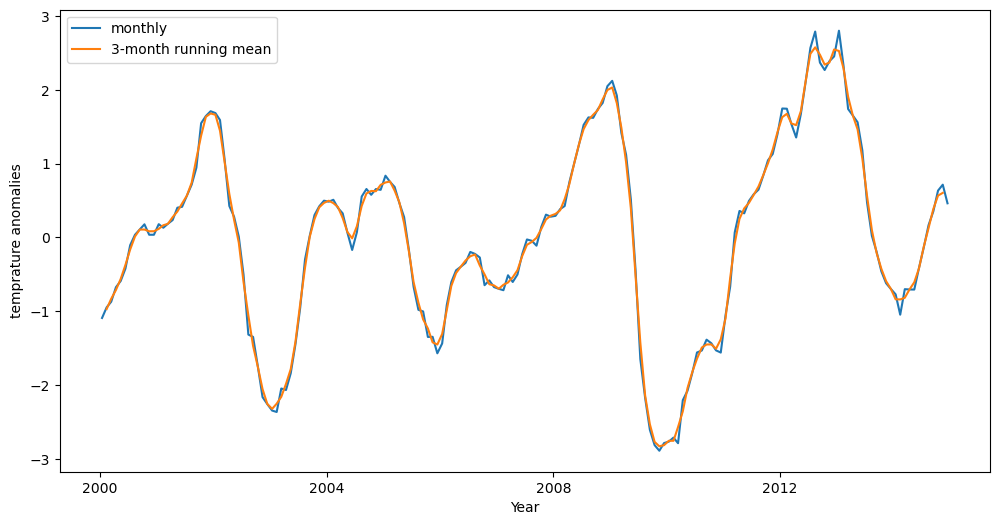

In [15]:
# define the plot size
fig = plt.figure(figsize=(12, 6))

# assign axis
ax = plt.axes()

# plot the monhtly data on the assigned axis
tos_nino34_anom_mean.plot(ax=ax)

# plot the smoothed data on the assigned axis
oni_index.plot(ax=ax)

# add legend
ax.legend(["monthly", "3-month running mean"])

# add ylabel
ax.set_ylabel("temprature anomalies")

# add xlabel
ax.set_xlabel("Year")


# Section 3: Identify El Niño and La Niña Events


We will highlight values in excess of $\pm$0.5, roughly corresponding to El Niño (warm) and La Niña (cold) events.


Text(0.5, 1.0, 'Oceanic Niño Index (ONI)')

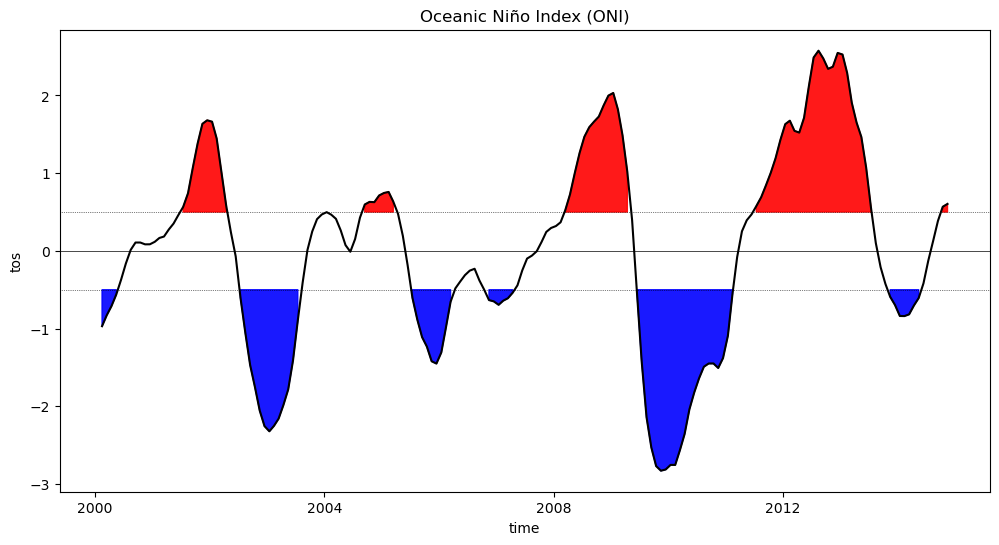

In [16]:
fig = plt.figure(figsize=(12, 6))  # assing figure size

plt.fill_between(  # plot with color in between
    oni_index.time.data,  # x values
    # top boundary - y values above 0.5
    oni_index.where(oni_index >= 0.5).data,
    0.5,  # bottom boundary - 0.5
    color="red",  # color
    alpha=0.9,  # transparency value
)
plt.fill_between(
    oni_index.time.data,
    oni_index.where(oni_index <= -0.5).data,
    -0.5,
    color="blue",
    alpha=0.9,
)

oni_index.plot(color="black")  # plot the smoothed data
plt.axhline(0, color="black", lw=0.5)  # add a black line at x=0
plt.axhline(
    0.5, color="black", linewidth=0.5, linestyle="dotted"
)  # add a black line at x=0.5
plt.axhline(
    -0.5, color="black", linewidth=0.5, linestyle="dotted"
)  # add a black line at x=-0.5
plt.title("Oceanic Niño Index (ONI)")


### Questions 3:

<!-- Sloane's ideas of climate content to add: -->

Now that we've normalized the data and highlighted SST anomalies that correspond to El Niño (warm) and La Niña (cold) events, consider the following questions:

1. How frequently do El Niño and La Niña events occur over the period of time studied here?
2. When were the strongest El Niño and La Niña events over this time period?
3. Considering the ocean-atmosphere interactions that cause El Niño and La Niña events, can you hypothesize potential reasons one El Niño or La Niña event may be stronger than others?


In [17]:
# to_remove explanation

"""
1. Based on the monthly Sea Surface Temperature (SST) data from 2000 to 2014, it appears that both the El Niño and La Niña phases (exceed +/- 0.5 ˚C) occurred roughly 4 times each over this period.
2. The strongest El Niño occurred in 2012 and the strongest La Niña occurred in 2010. Both strongest events happened in more recent years.
3. El Niño and La Niña events are primarily driven by the interactions between the ocean and the atmosphere. Their strength is impacted by factors involved in ocean-atmosphere interactions such as ocean heat content, strength of trade winds, rainfall (as explained  in the video), causing one El Niño or La Niña event to be stronger than another.
"""

# Summary

In this tutorial, we have learned to utilize a variety of Xarray tools to examine variations in SST during El Niño and La Niña events. We've practiced loading SST data from the CESM2 model, and masking data using the `.where()` function for focused analysis. We have also computed climatologies and anomalies using the `.groupby()` function, and learned to compute moving averages using the `.rolling()` function. Finally, we have calculated, normalized, and plotted the Oceanic Niño Index (ONI), enhancing our understanding of the El Niño Southern Oscillation (ENSO) and its impacts on global climate patterns.


# Resources

Data from this tutorial can be accessed [here](https://github.com/ProjectPythia/pythia-datasets).
